<div style="text-align: center;">
     <h1>OASIS INFOBYTE </h1>
    <h3>Author:-Srimanta Ghosh </h3>
    <h4>Task-5 </h4>
     <h2>Sales Prediction using Python</h2>
</div>

## Introduction
In this project, we aim to predict sales based on advertising expenditures in different media channels such as TV, radio, and newspaper. To achieve this, we employ a regression analysis approach using the Ordinary Least Squares (OLS) method. The dataset used in this analysis contains information on advertising budgets and corresponding sales figures. Our goal is to build a predictive model that accurately estimates sales based on the advertising budgets allocated to each media channel.

1. **Importing Necessary Libraries**: Importing libraries required for data manipulation, statistical modeling, visualization, and machine learning.

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

2. **Loading the Dataset**: Loading the advertising dataset and examining its basic information.

In [2]:
# Load the dataset
data = pd.read_csv(r"C:\Users\gh22s\Downloads\Advertising.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


3. **Data Preprocessing: Feature Scaling**: Standardizing numerical features using `StandardScaler` to ensure uniform scales across variables.

In [3]:
# Data Preprocessing
scaler = StandardScaler()
data[['TV', 'Radio', 'Newspaper']] = scaler.fit_transform(data[['TV', 'Radio', 'Newspaper']])

4. **Splitting the Data into Training and Testing Sets**: Dividing the dataset into training and testing sets for model evaluation.

In [4]:
# Split the Data
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. **Exploratory Data Analysis (EDA): Correlation Heatmap**: Visualizing the correlation between advertising budgets and sales using a heatmap.

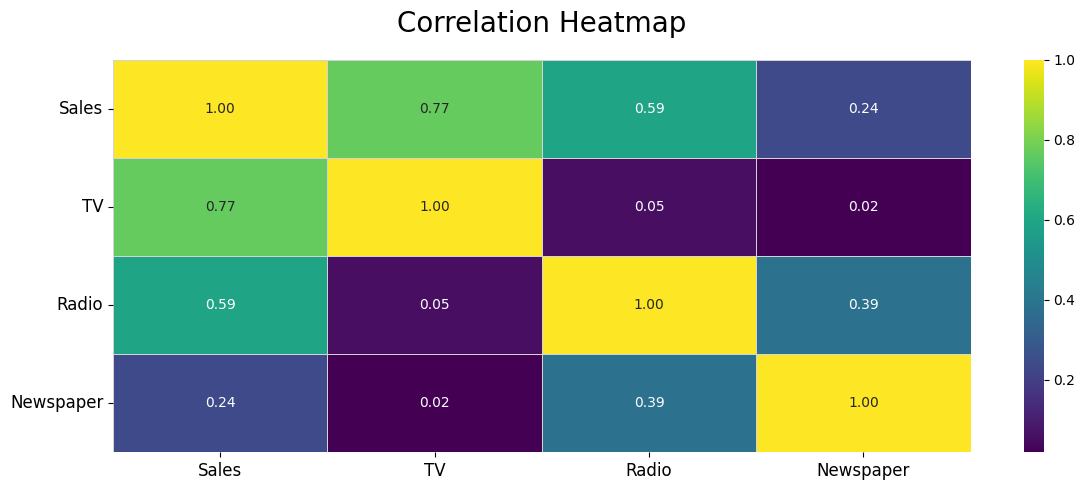

In [5]:
train_df = pd.concat([y_train, X_train], axis=1)
 
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12.05, 5))

# Customize heatmap
sns.heatmap(train_df.corr(), annot=True, cmap='viridis', fmt=".2f", linewidths=0.5, linecolor='lightgrey', ax=ax)

# Set title and adjust font size
ax.set_title('Correlation Heatmap', fontsize=20, pad=20)

# Customize tick labels font size and color
ax.tick_params(axis='both', labelsize=12, labelcolor='black')

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

# Add background color to the plot
ax.set_facecolor('whitesmoke')

# Display the plot
plt.tight_layout()
plt.show()

6. **Model Building: Ordinary Least Squares (OLS) Regression**: Constructing a regression model to predict sales based on advertising budgets.

In [6]:
# Choose a Model
model = ols("Sales ~ TV + Radio + Newspaper", data=train_df).fit()

7. **Model Evaluation: Summary Statistics**: Assessing the model's performance and significance through summary statistics.

In [7]:
# Evaluate the Model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     446.6
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           2.53e-76
Time:                        19:07:55   Log-Likelihood:                -306.64
No. Observations:                 160   AIC:                             621.3
Df Residuals:                     156   BIC:                             633.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.0420      0.132    106.501      0.0

8. **Model Evaluation: Analysis of Variance (ANOVA)**: Conducting an ANOVA analysis to evaluate the overall significance of the regression model.

In [8]:
# Perform ANOVA analysis
anova_table = anova_lm(model)
print(anova_table)

              df       sum_sq      mean_sq           F        PR(>F)
TV           1.0  2453.223909  2453.223909  884.206608  3.697178e-66
Radio        1.0  1263.329564  1263.329564  455.337299  3.995102e-48
Newspaper    1.0     0.425820     0.425820    0.153477  6.957694e-01
Residual   156.0   432.820708     2.774492         NaN           NaN


9. **Model Evaluation: Making Predictions**: Generating predictions for sales using the trained regression model.

In [9]:
# Make Predictions
y_pred = model.predict(X_test)
y_pred.head()

95     16.408024
15     20.889882
30     21.553843
158    10.608503
128    22.112373
dtype: float64

10. **Model Evaluation: Residual Analysis**: Analyzing residuals to assess the model's goodness of fit and the normality assumption.

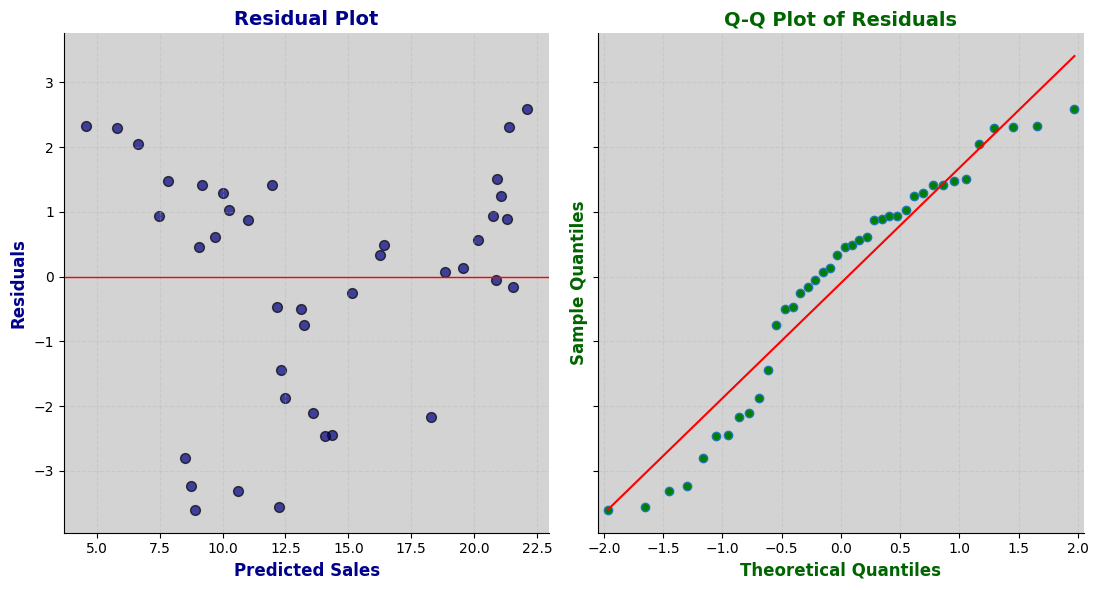

In [10]:
# Create subplots with a shared y-axis
fig, axs = plt.subplots(1, 2, figsize=(11.1, 6), sharey=True)

# Residual plot
residuals = y_test - y_pred
axs[0].scatter(y_pred, residuals, color='navy', alpha=0.7, edgecolor='black', marker='o', s=50)
axs[0].axhline(y=0, color='red', linestyle='-', linewidth=1)
axs[0].set_xlabel("Predicted Sales", fontsize=12, fontweight='bold', color='darkblue')
axs[0].set_ylabel("Residuals", fontsize=12, fontweight='bold', color='darkblue')
axs[0].set_title("Residual Plot", fontsize=14, fontweight='bold', color='darkblue')
axs[0].grid(True, linestyle='--', alpha=0.3)
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].set_facecolor('lightgrey')

# Q-Q plot of residuals
sm.qqplot(residuals, line='s', ax=axs[1], marker='o', markerfacecolor='green', markersize=6)
axs[1].set_title('Q-Q Plot of Residuals', fontsize=14, fontweight='bold', color='darkgreen')
axs[1].set_xlabel("Theoretical Quantiles", fontsize=12, fontweight='bold', color='darkgreen')
axs[1].set_ylabel("Sample Quantiles", fontsize=12, fontweight='bold', color='darkgreen')
axs[1].grid(True, linestyle='--', alpha=0.3)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].set_facecolor('lightgrey')

# Adjust layout and display
plt.tight_layout()
plt.show()

## Conclusion
Through comprehensive data preprocessing, model building, and evaluation techniques, we have developed a regression model capable of predicting sales based on advertising expenditures. The model's performance metrics, including R-squared value, ANOVA analysis, and residual plots, provide insights into its accuracy and reliability. This predictive model can be utilized by businesses to optimize their advertising strategies and maximize sales revenue. However, further validation and refinement may be necessary to enhance its predictive capabilities in real-world scenarios.